In [170]:
pip install plotly dash pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt


In [172]:
# Read OnlineRetail1.csv 
OnlineRetail1_df = pd.read_csv('OnlineRetail1.csv')
OnlineRetail1_df.head()





,InvoiceID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [173]:
OnlineRetail1_df.shape


(1039, 8)

In [174]:
print (OnlineRetail1_df.isnull().sum()) 


InvoiceID      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64


In [175]:
OnlineRetail1_df = OnlineRetail1_df.dropna()


In [176]:
print (OnlineRetail1_df.isnull().sum()) 


InvoiceID      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [177]:
duplicate_rows=OnlineRetail1_df.duplicated()
OnlineRetail1_df.duplicated().sum() 


np.int64(23)

In [178]:
OnlineRetail1_df =OnlineRetail1_df.drop_duplicates()


In [179]:
duplicate_rows=OnlineRetail1_df.duplicated()
OnlineRetail1_df.duplicated().sum() 


np.int64(0)

In [180]:
OnlineRetail1_df.columns


Index(['InvoiceID', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [181]:
print(OnlineRetail1_df.dtypes)


InvoiceID       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [182]:
# Remove 'StockCode' and 'CustomerID' columns
OnlineRetail2_df = OnlineRetail1_df.drop(columns=['StockCode', 'CustomerID'])

# Verification
print(OnlineRetail2_df.columns)

Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')


In [183]:
# Convert 'InvoiceID' to categorical codes (numerical)
OnlineRetail2_df['InvoiceID'] = OnlineRetail2_df['InvoiceID'].astype('category').cat.codes

# Verify the conversion
print(OnlineRetail2_df['InvoiceID'].dtype)

int8


In [184]:
# Convert 'InvoiceDate' to datetime format

OnlineRetail2_df['InvoiceDate'] = pd.to_datetime(OnlineRetail2_df['InvoiceDate'], format='%d/%m/%Y', errors='coerce')

# Verify the conversion
print(OnlineRetail2_df['InvoiceDate'].dtype)




datetime64[ns]


In [185]:
print(OnlineRetail2_df.dtypes)


InvoiceID                int8
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object


In [186]:
# Read StoreSales.csv

StoreSales_df = pd.read_csv('StoreSales.csv')
StoreSales_df.head()


,InvoiceID,Country,Description,UnitPrice,Quantity,Tax 5%,InvoiceDate,Payment
0,750-67-8428,Yangon,Health and beauty,74.69,7,26.1415,1/05/2019,Ewallet
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5,3.8200,3/08/2019,Cash
2,631-41-3108,Yangon,Home and lifestyle,46.33,7,16.2155,3/03/2019,Credit card
3,123-19-1176,Yangon,Health and beauty,58.22,8,23.2880,1/27/2019,Ewallet
4,373-73-7910,Yangon,Sports and travel,86.31,7,30.2085,2/08/2019,Ewallet


In [187]:
StoreSales_df.shape


(1000, 8)

In [188]:
StoreSales_df.columns


Index(['InvoiceID', 'Country', 'Description', 'UnitPrice', 'Quantity',
       'Tax 5%', 'InvoiceDate', 'Payment'],
      dtype='object')

In [189]:
print (StoreSales_df.isnull().sum()) 


InvoiceID      0
Country        0
Description    0
UnitPrice      0
Quantity       0
Tax 5%         0
InvoiceDate    0
Payment        0
dtype: int64


In [190]:
duplicate_rows=StoreSales_df.duplicated()
StoreSales_df.duplicated().sum()


np.int64(0)

In [191]:
StoreSales_df.dtypes


InvoiceID       object
Country         object
Description     object
UnitPrice      float64
Quantity         int64
Tax 5%         float64
InvoiceDate     object
Payment         object
dtype: object

In [192]:
# Remove 'Tax 5%', and 'Payment' columns
StoreSales2_df = StoreSales_df.drop(columns=['Tax 5%', 'Payment'])

# Verification
print(StoreSales2_df.columns)


Index(['InvoiceID', 'Country', 'Description', 'UnitPrice', 'Quantity',
       'InvoiceDate'],
      dtype='object')


In [193]:
# Convert 'InvoiceID' to categorical codes (numerical)
StoreSales2_df['InvoiceID'] = StoreSales2_df['InvoiceID'].astype('category').cat.codes

# Verify the conversion
print(StoreSales2_df['InvoiceID'].dtype)

int16


In [194]:
## Convert 'InvoiceDate' to datetime format
StoreSales2_df['InvoiceDate'] = pd.to_datetime(StoreSales2_df['InvoiceDate'], format='%d/%m/%Y', errors='coerce')

# Verify the conversion
print(StoreSales2_df['InvoiceDate'].dtype)


datetime64[ns]


In [195]:
print(StoreSales2_df.dtypes)


InvoiceID               int16
Country                object
Description            object
UnitPrice             float64
Quantity                int64
InvoiceDate    datetime64[ns]
dtype: object


In [196]:
StoreSales2_df = StoreSales2_df.rename_axis(index={'InvoiceID': 'InvoiceID'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Country': 'Country'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Description': 'Description'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'UnitPrice': 'UnitPrice'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Quantity': 'Quantity'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'Quantity': 'Quantity'})
StoreSales2_df = StoreSales2_df.rename_axis(index={'InvoiceDate': 'InvoiceDate'})

In [197]:
# Print the original columns
print("Original columns:")
print(StoreSales2_df.columns)




Original columns:
Index(['InvoiceID', 'Country', 'Description', 'UnitPrice', 'Quantity',
       'InvoiceDate'],
      dtype='object')


In [198]:
# Define the new order of columns
new_order = ['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country']

# Reorder columns
StoreSales2_df = StoreSales2_df[new_order]

# Print the reordered columns
print("\nReordered columns:")
print(StoreSales2_df.columns)





Reordered columns:
Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')


In [199]:
OnlineRetail2_df.columns


Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [200]:
print(StoreSales2_df.dtypes)
print(OnlineRetail2_df.dtypes)



InvoiceID               int16
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object
InvoiceID                int8
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object


In [201]:
StoreSales2_df['InvoiceID'] = StoreSales2_df['InvoiceID'].astype('int64')
OnlineRetail2_df['InvoiceID'] = OnlineRetail2_df['InvoiceID'].astype('int64')

print(StoreSales2_df.dtypes)
print(OnlineRetail2_df.dtypes)



InvoiceID               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object
InvoiceID               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object


In [202]:
OnlineRetail2_df.columns



Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [203]:
StoreSales2_df.columns



Index(['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [204]:
StoreSales2_df.shape


(1000, 6)

In [205]:
OnlineRetail2_df.shape

(1015, 6)

In [206]:
common_columns = ['InvoiceID', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country']
OnlineRetail2_df = OnlineRetail2_df[common_columns]
StoreSales2_df = StoreSales2_df [common_columns]


In [207]:
StoreSales2_df.head()


,InvoiceID,Description,Quantity,InvoiceDate,UnitPrice,Country
0,814,Health and beauty,7,2019-05-01,74.69,Yangon
1,142,Electronic accessories,5,2019-08-03,15.28,Naypyitaw
2,653,Home and lifestyle,7,2019-03-03,46.33,Yangon
3,18,Health and beauty,8,NaT,58.22,Yangon
4,339,Sports and travel,7,2019-08-02,86.31,Yangon


In [208]:
OnlineRetail2_df.head()


,InvoiceID,Description,Quantity,InvoiceDate,UnitPrice,Country
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,United Kingdom
1,0,WHITE METAL LANTERN,6,NaT,3.39,United Kingdom
2,0,CREAM CUPID HEARTS COAT HANGER,8,NaT,2.75,United Kingdom
3,0,KNITTED UNION FLAG HOT WATER BOTTLE,6,NaT,3.39,United Kingdom
4,0,RED WOOLLY HOTTIE WHITE HEART.,6,NaT,3.39,United Kingdom


In [209]:
print (OnlineRetail2_df.isnull().sum()) 


InvoiceID         0
Description       0
Quantity          0
InvoiceDate    1015
UnitPrice         0
Country           0
dtype: int64


In [210]:
# Remove InvoiceDate
OnlineRetail2_df = OnlineRetail2_df.drop(columns=['InvoiceDate'])

# Verification
print(OnlineRetail2_df.columns)


Index(['InvoiceID', 'Description', 'Quantity', 'UnitPrice', 'Country'], dtype='object')


In [211]:
print (StoreSales2_df.isnull().sum()) 


InvoiceID        0
Description      0
Quantity         0
InvoiceDate    587
UnitPrice        0
Country          0
dtype: int64


In [212]:
# Remove InvoiceDate
StoreSales2_df = StoreSales2_df.drop(columns=['InvoiceDate'])

# Verification
print(StoreSales2_df.columns)



Index(['InvoiceID', 'Description', 'Quantity', 'UnitPrice', 'Country'], dtype='object')


In [213]:
StoreSales2_df.to_csv('StoreSales2_df.csv', index=False)


In [214]:
OnlineRetail2_df.to_csv('OnlineRetail2_df.csv', index=False)


In [215]:
# Concatenate DataFrames to stack rows
unified_df = pd.concat([StoreSales2_df, OnlineRetail2_df], ignore_index=True)

print(unified_df)


      InvoiceID                        Description  Quantity  UnitPrice  \
0           814                  Health and beauty         7      74.69   
1           142             Electronic accessories         5      15.28   
2           653                 Home and lifestyle         7      46.33   
3            18                  Health and beauty         8      58.22   
4           339                  Sports and travel         7      86.31   
...         ...                                ...       ...        ...   
2010         62      MULTICOLOUR  CONFETTI IN TUBE         1       1.65   
2011         62      ORANGE SCENTED SET/9 T-LIGHTS         1       0.85   
2012         62  SET/10 RED POLKADOT PARTY CANDLES         1       1.25   
2013         62          PLACE SETTING WHITE HEART         2       0.42   
2014         62        ZINC METAL HEART DECORATION         2       1.25   

             Country  
0             Yangon  
1          Naypyitaw  
2             Yangon  
3      

In [216]:
unified_df.to_csv('unified.csv', index=False)


In [217]:
unified_df.to_csv('unified.csv', index=False)


In [218]:
unified_df.columns


Index(['InvoiceID', 'Description', 'Quantity', 'UnitPrice', 'Country'], dtype='object')

In [219]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [220]:
print("\nBasic statistics for each numeric column:")
print(unified_df.describe())




Basic statistics for each numeric column:
         InvoiceID     Quantity    UnitPrice
count  2015.000000  2015.000000  2015.000000
mean    266.895285     9.065509    29.151573
std     307.964034    27.370036    32.539281
min       0.000000   -24.000000     0.100000
25%      40.000000     2.000000     1.950000
50%      60.000000     5.000000    10.950000
75%     495.500000     8.000000    54.890000
max     999.000000   600.000000   165.000000


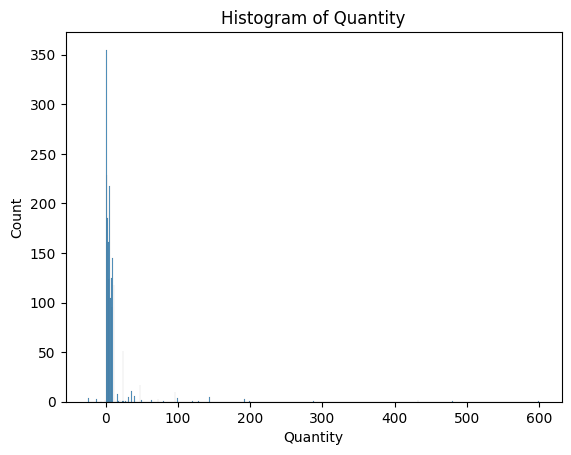

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of a specific column
sns.histplot(unified_df['Quantity'])
plt.title('Histogram of Quantity')
plt.show()

In [222]:
# Calculate SalesTotal
unified_df['SalesTotal'] = unified_df['Quantity'] * unified_df['UnitPrice']

# Total sales across all transactions
total_sales =unified_df['SalesTotal'].sum()
print("\nTotal Sales Across All Transactions: ${:.2f}".format(total_sales))


Total Sales Across All Transactions: $332113.74


In [223]:
# Sales by Product Category
sales_by_category = unified_df.groupby('Description')['SalesTotal'].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(sales_by_category)


Sales by Product Category:
Description
Food and beverages                  53471.28
Sports and travel                   52497.93
Electronic accessories              51750.03
Fashion accessories                 51719.90
Home and lifestyle                  51297.06
                                      ...   
PACK OF 12 PINK PAISLEY TISSUES        -6.96
PLASTERS IN TIN VINTAGE PAISLEY        -9.90
PLASTERS IN TIN SKULLS                -18.15
PLASTERS IN TIN CIRCUS PARADE         -19.80
Discount                              -27.50
Name: SalesTotal, Length: 618, dtype: float64


In [224]:


# Assuming 'unified_df' is defined elsewhere
# Aggregate sales by country and product category
sales_by_country_category = unified_df.groupby(['Country', 'Description'], as_index=False)['SalesTotal'].sum()

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Sales of Product Categories by Country"),
    
    dcc.RadioItems(
        id='category-selector',
        options=[{'label': category.lower(), 'value': category} for category in sales_by_country_category['Description'].unique()],
        value=sales_by_country_category['Description'].unique()[0],  # Initially select the first category
        labelStyle={'display': 'inline-block'}
    ),
    
    dcc.Graph(
        id='choropleth-map'
    )
])

# Define callback to update choropleth map based on category selection
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('category-selector', 'value')]
)
def update_choropleth(selected_category):
    filtered_df = sales_by_country_category[sales_by_country_category['Description'] == selected_category]
    
    # Create choropleth map
    fig = px.choropleth(filtered_df, 
                        locations='Country',
                        locationmode='country names',
                        color='SalesTotal',  # Color by total sales
                        hover_name='Country',  # Show country name on hover
                        hover_data=['Description', 'SalesTotal'],  # Additional data on hover
                        color_continuous_scale='rainbow',  # Color scale
                        projection='natural earth')  # Map projection
    
    # Customize layout
    fig.update_layout(title='Sales of Product Categories by Country',
                      geo=dict(showcoastlines=True, showframe=False))  # Customize map appearance
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [225]:
unified_df.to_csv('unified1.csv', index=False)